In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/antoineguerrini/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [455]:
#d = pd.read_csv('/Users/antoineguerrini/Desktop/Train_ML.csv', error_bad_lines=False)

In [456]:
#snipet = d.sample(frac=0.045, replace=True, random_state=42)

In [457]:
#snipet.to_excel('Snipet_ML.xlsx')

In [5]:
df = pd.read_excel('/Users/antoineguerrini/SnipetML.xlsx', error_bad_lines=False)

In [6]:
#del df['Unnamed: 0']

In [7]:
df.isnull().sum()

Unnamed: 0       0
ID               0
keywords      1114
age              0
sex              0
dtype: int64

In [8]:
df.dropna(subset=['keywords'], inplace=True)
df.shape

(8886, 5)

In [9]:
df.dtypes

Unnamed: 0     int64
ID             int64
keywords      object
age            int64
sex           object
dtype: object

In [10]:
type(df[:1]["keywords"])

pandas.core.series.Series

### Data processing

In this section we aim to transform the variable "keywords" in order to make it processable for further feature engineerings.

In [11]:
from nltk.corpus import stopwords
c = stopwords.words('french')

In [12]:
import string
nopunc = [char for char in df if char not in string.punctuation]

We create a function which will 
    
    1) Split the words and the occurences 
    
    2) Assign them to two lists 
    
    3) Create a sentence based on words * occurences 
    
    4) Discard the "stopword"

In [13]:
def processing(x):
    list_subset =[]
    for item in x:
        item = x.split(';') 

    for i in range (0,len(item)):
        list_subset = list_subset+ item[i].split(':')
        
    for i in range (1,len(list_subset)):
        if i%2 !=0:
            list_subset[i] = int(list_subset[i])
            
    integer = [x for x in list_subset if isinstance(x, int)]
    string = [x for x in list_subset if isinstance(x, str)]
    
    word = sum([[s] * n for s, n in zip(string, integer)], [])
    number = [x for x in word if not any(c.isdigit() for c in x)]
    
    final_selection = [y for y in number if word not in c]

    return final_selection

In [14]:
df['Full_Wording'] = df["keywords"].apply(processing)

# Feature engineering

In this section we want to create relevant features in order to support our modeling. In order to achieve that objective, we used Counter and Nltk libraries. We parallelly observed the data with visualisations to assess the impact of our findings. (Please refer to the pdf attached to this document).

..



### 1) Extraction of the wording's length

In [15]:
from collections import Counter
length = []
for i in df['Full_Wording']:
    a = len(i)+1
    length.append(a)

In [16]:
df['Length'] = length

![Average Length by Gender](img/length_gender.png)

![Average Length by Gender](img/distance.png)

## 2) Extraction of the words and occurences

In [17]:
Occurence = []
Word = []
for i in df['Full_Wording']:
    b = Counter(i).values()
    c = Counter(i).keys()
    Occurence.append(b)
    Word.append(c)

In [18]:
df["Occurence"] = Occurence
df["Word"] = Word

### 3) Extraction of the unique value

In [19]:
Number_Unique = []
for i in df.Word:
    e = len(Counter(i).keys())
    Number_Unique.append(e)

In [20]:
df["Unique_Value"] = Number_Unique

![Average Length by Gender](img/Unique.png)

### 4) Calculation to compare from the benchmark

In [21]:
mean_unique = df['Unique_Value'].mean()
std_unique = df['Unique_Value'].std()

mean_length = df['Length'].mean()
std_length = df['Length'].std()

In [22]:
df['Unique_from_the_Avg'] = df['Unique_Value'] - mean_unique
df['Unique_volatility'] = df['Unique_Value'] / std_unique

df['Length_from_the_Avg'] = df['Length'] - mean_length
df['Length_volatility'] = df['Unique_Value'] / std_length

In [23]:
df.head()

,Unnamed: 0,ID,keywords,age,sex,Full_Wording,Length,Occurence,Word,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility
0,5571877,4814904,les:1;high:1;leur:1;agent:1;des:1;comme:1;deve...,42,M,"[les, high, leur, agent, des, comme, developpe...",14,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)","(les, high, leur, agent, des, comme, developpe...",13,-5.258384,0.387096,-30.289219,0.108084
1,2029092,232820,anteflechi:1;guerlus:1;forum:1;affich:1;defini...,48,F,"[anteflechi, guerlus, forum, affich, definitio...",11,"(1, 1, 1, 1, 1, 1, 2, 1, 1)","(anteflechi, guerlus, forum, affich, definitio...",9,-9.258384,0.267990,-33.289219,0.074827
2,2718399,78339,epaule:1;forum:1;affich:1;craquements:1;douleu...,47,F,"[epaule, forum, affich, craquements, douleurs]",6,"(1, 1, 1, 1, 1)","(epaule, forum, affich, craquements, douleurs)",5,-13.258384,0.148883,-38.289219,0.041571
4,1209891,183059,tesla:1;embarrasse:1;ouragan:1;photo:10;ses:1;...,47,F,"[tesla, embarrasse, ouragan, photo, photo, pho...",98,"(1, 1, 1, 10, 1, 10, 1, 1, 10, 10, 1, 1, 1, 10...","(tesla, embarrasse, ouragan, photo, ses, prono...",25,6.741616,0.744416,53.710781,0.207853
5,763427,641104,journal:1;jean:1;kardashian:1;laura:1;enfants:...,54,F,"[journal, jean, kardashian, laura, enfants, le...",404,"(1, 1, 1, 1, 1, 43, 1, 1, 1, 1, 1, 1, 1, 43, 1...","(journal, jean, kardashian, laura, enfants, le...",106,87.741616,3.156322,359.710781,0.881299


### 5) Extracting the top frequencies

In [26]:
#df["Occurence"] = df["Occurence"].astype(str)

In [27]:
Max = []
for i in df.Occurence:
    i = max(i,default=0)
    Max.append(i)

In [28]:
df['Max_Frequence'] = Max

In [29]:
df = df.query('Max_Frequence > 1')

### 6) Extracting the top words

In [30]:
#df['Full_Wording'] = df['Full_Wording'].astype(str)

In [31]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [32]:
Top = []
for i in df['Full_Wording']:
    i = Most_Common(i)
    Top.append(i)    

In [33]:
df['Top_Word'] = Top

### 7) Extracting the words' typology

In [34]:
Typology = []
for i in df['Top_Word']:
    i = nltk.word_tokenize(i)
    e = nltk.pos_tag(i)
    Typology.append(e)

In [35]:
df['Typology'] = Typology

In [36]:
df['Typology'] = df['Typology'].astype(str)

In [37]:
Typology_2 = []
for i in df['Typology']:
    i = i.split(',', 1)[1]
    i = i[:-2]
    Typology_2.append(i)
df['Typology'] = Typology_2

### 8) Simplifying the readability of the variable Age

In [38]:
Age = []
for i in df.age:
    if i < 30:
        Age.append(1)
    elif i < 40:
        Age.append(2)
    elif i < 50:
        Age.append(3)
    elif i < 60:
        Age.append(4)
    else:
        Age.append(5)

In [39]:
df['age'] = Age

# Creating the dataset for the modeling part

In [40]:
data = df[['age', 'sex', 'Length',
       'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence', 'Typology']].copy()

### Removing outliers

In [41]:
from scipy.stats import zscore
from scipy import stats
z_scores = stats.zscore(data.Length)

In [42]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

### Deleting the high correlations 

In [43]:
data.corr()

,age,Length,Unique_Value,Unique_from_the_Avg,Unique_volatility,Length_from_the_Avg,Length_volatility,Max_Frequence
age,1.000000,0.081204,0.075604,0.075604,0.075604,0.081204,0.075604,0.055550
Length,0.081204,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Unique_Value,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_from_the_Avg,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Unique_volatility,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Length_from_the_Avg,0.081204,1.000000,0.775133,0.775133,0.775133,1.000000,0.775133,0.810986
Length_volatility,0.075604,0.775133,1.000000,1.000000,1.000000,0.775133,1.000000,0.406050
Max_Frequence,0.055550,0.810986,0.406050,0.406050,0.406050,0.810986,0.406050,1.000000


In [44]:
del data['Length']

# Modeling

In [45]:
data.columns

Index(['age', 'sex', 'Unique_Value', 'Unique_from_the_Avg',
       'Unique_volatility', 'Length_from_the_Avg', 'Length_volatility',
       'Max_Frequence', 'Typology'],
      dtype='object')

In [46]:
data = pd.get_dummies(data, columns=['age','Typology'])

In [47]:
X = data.loc[:, data.columns !="sex"]
y = data.loc[:, data.columns =="sex"]

In [48]:
y = pd.get_dummies(y, drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify = y)

### Radom Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       486
           1       0.57      0.61      0.59       547

    accuracy                           0.55      1033
   macro avg       0.54      0.54      0.54      1033
weighted avg       0.55      0.55      0.55      1033



In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[233 253]
 [214 333]]


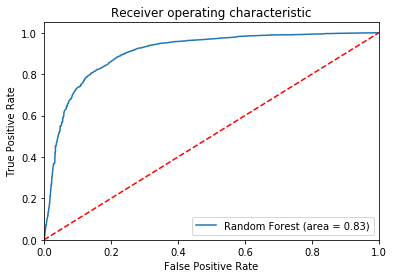

In [56]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y, rfc.predict(X)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()